In [1]:
#!/.venv/bin/ python
# -*- encoding: utf-8 -*-
'''
@file        :SML_project.ipynb
@description :
@creation    :2025/11/27 11:53:14
@author      :Zhiwei Yan
@version      :1.0
'''

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Features engineering

**Answer questions**

(i) Which are the numerical features and which are the categorical features?

(ii) Is there a greater trend to need an increase in the availability of bicycles? Study this question

from various perspectives:

• Can any trend be seen comparing different hours, weeks, and months?

• Is there any difference between weekdays and holidays?

• Is there any trend depending on the weather? Rainy days, snowy days, etc

In [2]:
# load data
with open('../projects_materials/training_data_ht2025.csv','r') as f:
    df = pd.read_csv(f)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour_of_day     1600 non-null   int64  
 1   day_of_week     1600 non-null   int64  
 2   month           1600 non-null   int64  
 3   holiday         1600 non-null   int64  
 4   weekday         1600 non-null   int64  
 5   summertime      1600 non-null   int64  
 6   temp            1600 non-null   float64
 7   dew             1600 non-null   float64
 8   humidity        1600 non-null   float64
 9   precip          1600 non-null   float64
 10  snow            1600 non-null   int64  
 11  snowdepth       1600 non-null   float64
 12  windspeed       1600 non-null   float64
 13  cloudcover      1600 non-null   float64
 14  visibility      1600 non-null   float64
 15  increase_stock  1600 non-null   object 
dtypes: float64(8), int64(7), object(1)
memory usage: 200.1+ KB


In [3]:
numeric_cols = ['hour_of_day',
                'day_of_week',
                'month',
                'temp', 
                'dew', 
                'humidity',
                'precip', 
                'snowdepth',
                'windspeed',
                'cloudcover',
                'visibility']

categorical_cols = ['holiday',
                    'weekday',
                    'summertime',
                    'snow',
                    'increase_stock']

numeric_data = df.loc[:, numeric_cols]
categoric_data = df.loc[:, categorical_cols]

print(f"There are {len(numeric_cols)} numeric features: \n {numeric_cols} \n")
print(f"There are {len(categorical_cols)} categorical features: \n {categorical_cols} \n")

There are 11 numeric features: 
 ['hour_of_day', 'day_of_week', 'month', 'temp', 'dew', 'humidity', 'precip', 'snowdepth', 'windspeed', 'cloudcover', 'visibility'] 

There are 5 categorical features: 
 ['holiday', 'weekday', 'summertime', 'snow', 'increase_stock'] 



In [4]:
numeric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
hour_of_day,1600.0,11.371250,6.948370,0.00,5.000,12.000,17.000,23.000
day_of_week,1600.0,3.022500,2.012965,0.00,1.000,3.000,5.000,6.000
month,1600.0,6.468750,3.454741,1.00,3.000,6.000,9.000,12.000
temp,1600.0,15.210313,9.264785,-9.10,7.700,15.500,23.200,35.600
dew,1600.0,7.750750,10.026459,-18.40,-0.800,8.300,16.800,24.300
humidity,1600.0,63.927844,19.079419,15.85,47.845,65.175,79.955,99.890
precip,1600.0,0.122042,0.920600,0.00,0.000,0.000,0.000,25.871
snowdepth,1600.0,0.042713,0.421198,0.00,0.000,0.000,0.000,6.710
windspeed,1600.0,13.082500,7.756652,0.00,7.500,12.300,17.600,43.800
cloudcover,1600.0,64.322375,32.748869,0.00,28.800,79.300,92.800,100.000


In [5]:
categoric_data.describe().T

,count,mean,std,min,25%,50%,75%,max
holiday,1600.0,0.033125,0.179019,0.0,0.0,0.0,0.0,1.0
weekday,1600.0,0.710000,0.453904,0.0,0.0,1.0,1.0,1.0
summertime,1600.0,0.643750,0.479040,0.0,0.0,1.0,1.0,1.0
snow,1600.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


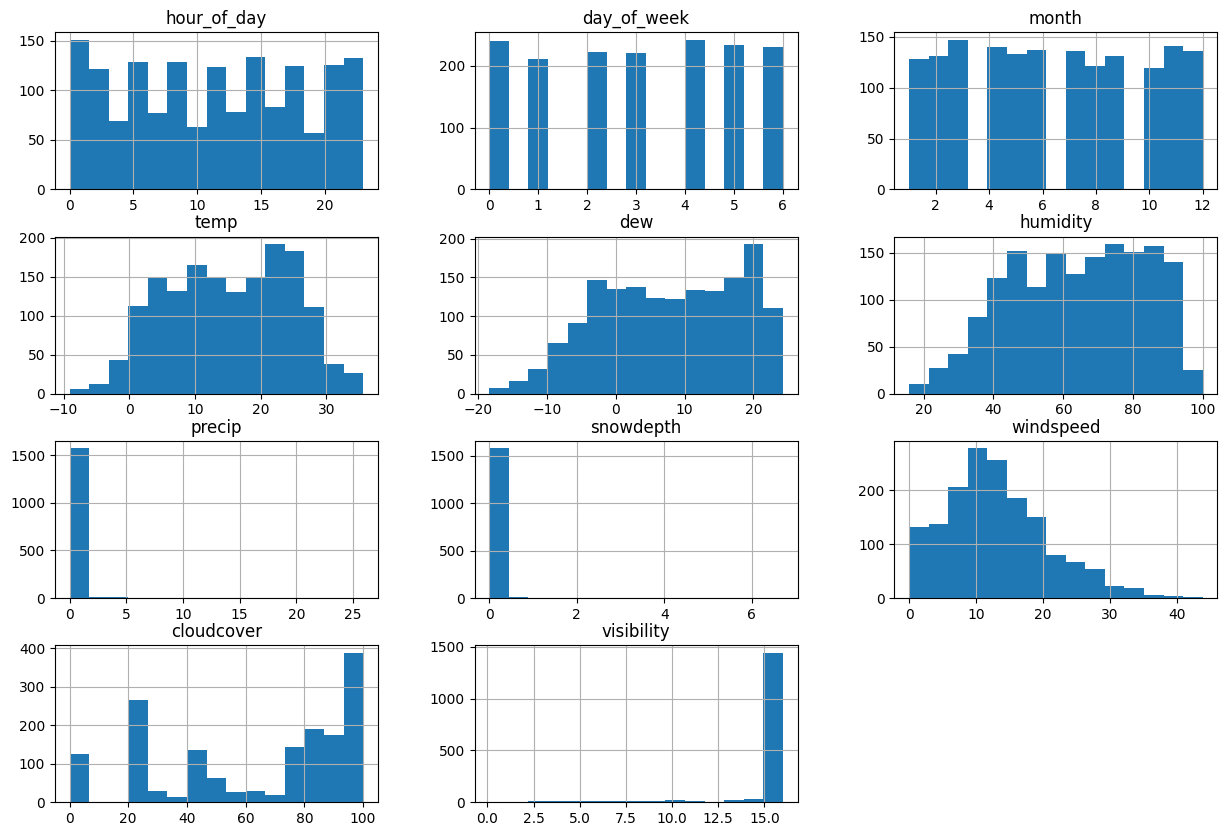

In [6]:
numeric_data.hist(bins=15, figsize=(15,10), layout=(4,3));
fig = plt.gcf()
fig.savefig("../report/figures/num_dist.png")

In [7]:
numeric_data.nunique()

hour_of_day      24
day_of_week       7
month            12
temp            343
dew             313
humidity       1431
precip          126
snowdepth        41
windspeed       281
cloudcover      232
visibility       83
dtype: int64

In [8]:
categoric_data.nunique()

holiday           2
weekday           2
summertime        2
snow              1
increase_stock    2
dtype: int64

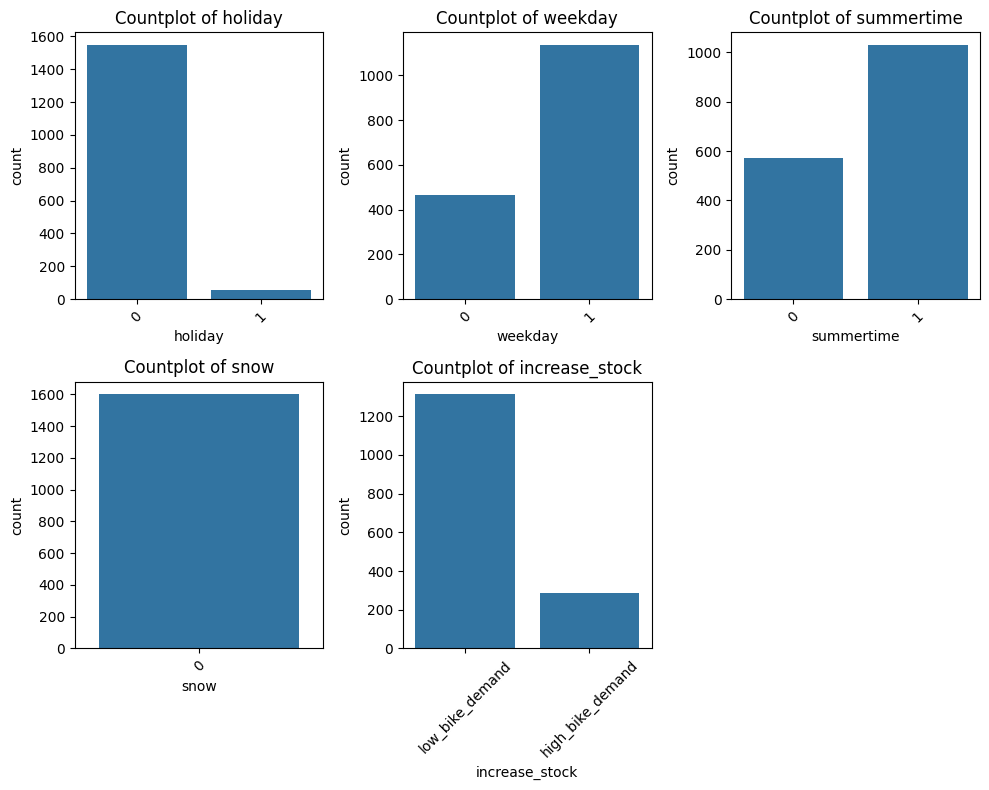

In [37]:
import math
# Number of plots
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 4 * n_rows))
axes = axes.flatten()  # flatten to 1D for easy indexing

for i, col in enumerate(categorical_cols):
    sns.countplot(data=categoric_data, x=col, ax=axes[i])
    axes[i].set_title(f"Countplot of {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Hide any unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

fig.savefig("../report/figures/count_plot_category.png")

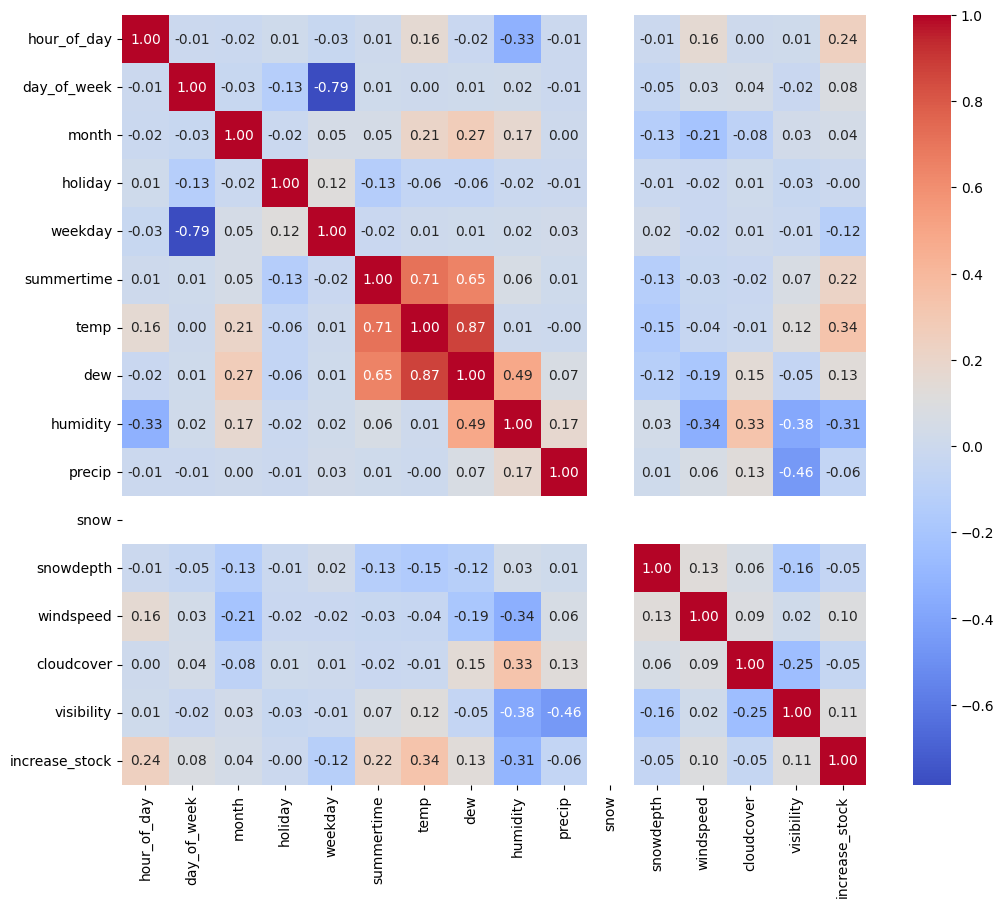

In [10]:
# change targets object string to 1/0
df.loc[df['increase_stock']=='high_bike_demand', 'increase_stock'] = 1
df.loc[df['increase_stock']=='low_bike_demand', 'increase_stock'] = 0


# check correlation 
fig = plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f");
plt.show()

fig.savefig("../report/figures/corr_map.png")



In [11]:
corr = df.corr().loc['increase_stock'].abs().sort_values(ascending=False)
corr


increase_stock    1.000000
temp              0.336981
humidity          0.308726
hour_of_day       0.240544
summertime        0.216052
dew               0.132663
weekday           0.116446
visibility        0.113443
windspeed         0.096011
day_of_week       0.083688
precip            0.059304
snowdepth         0.047526
cloudcover        0.045534
month             0.037212
holiday           0.004909
snow                   NaN
Name: increase_stock, dtype: float64

<Figure size 1200x1000 with 0 Axes>

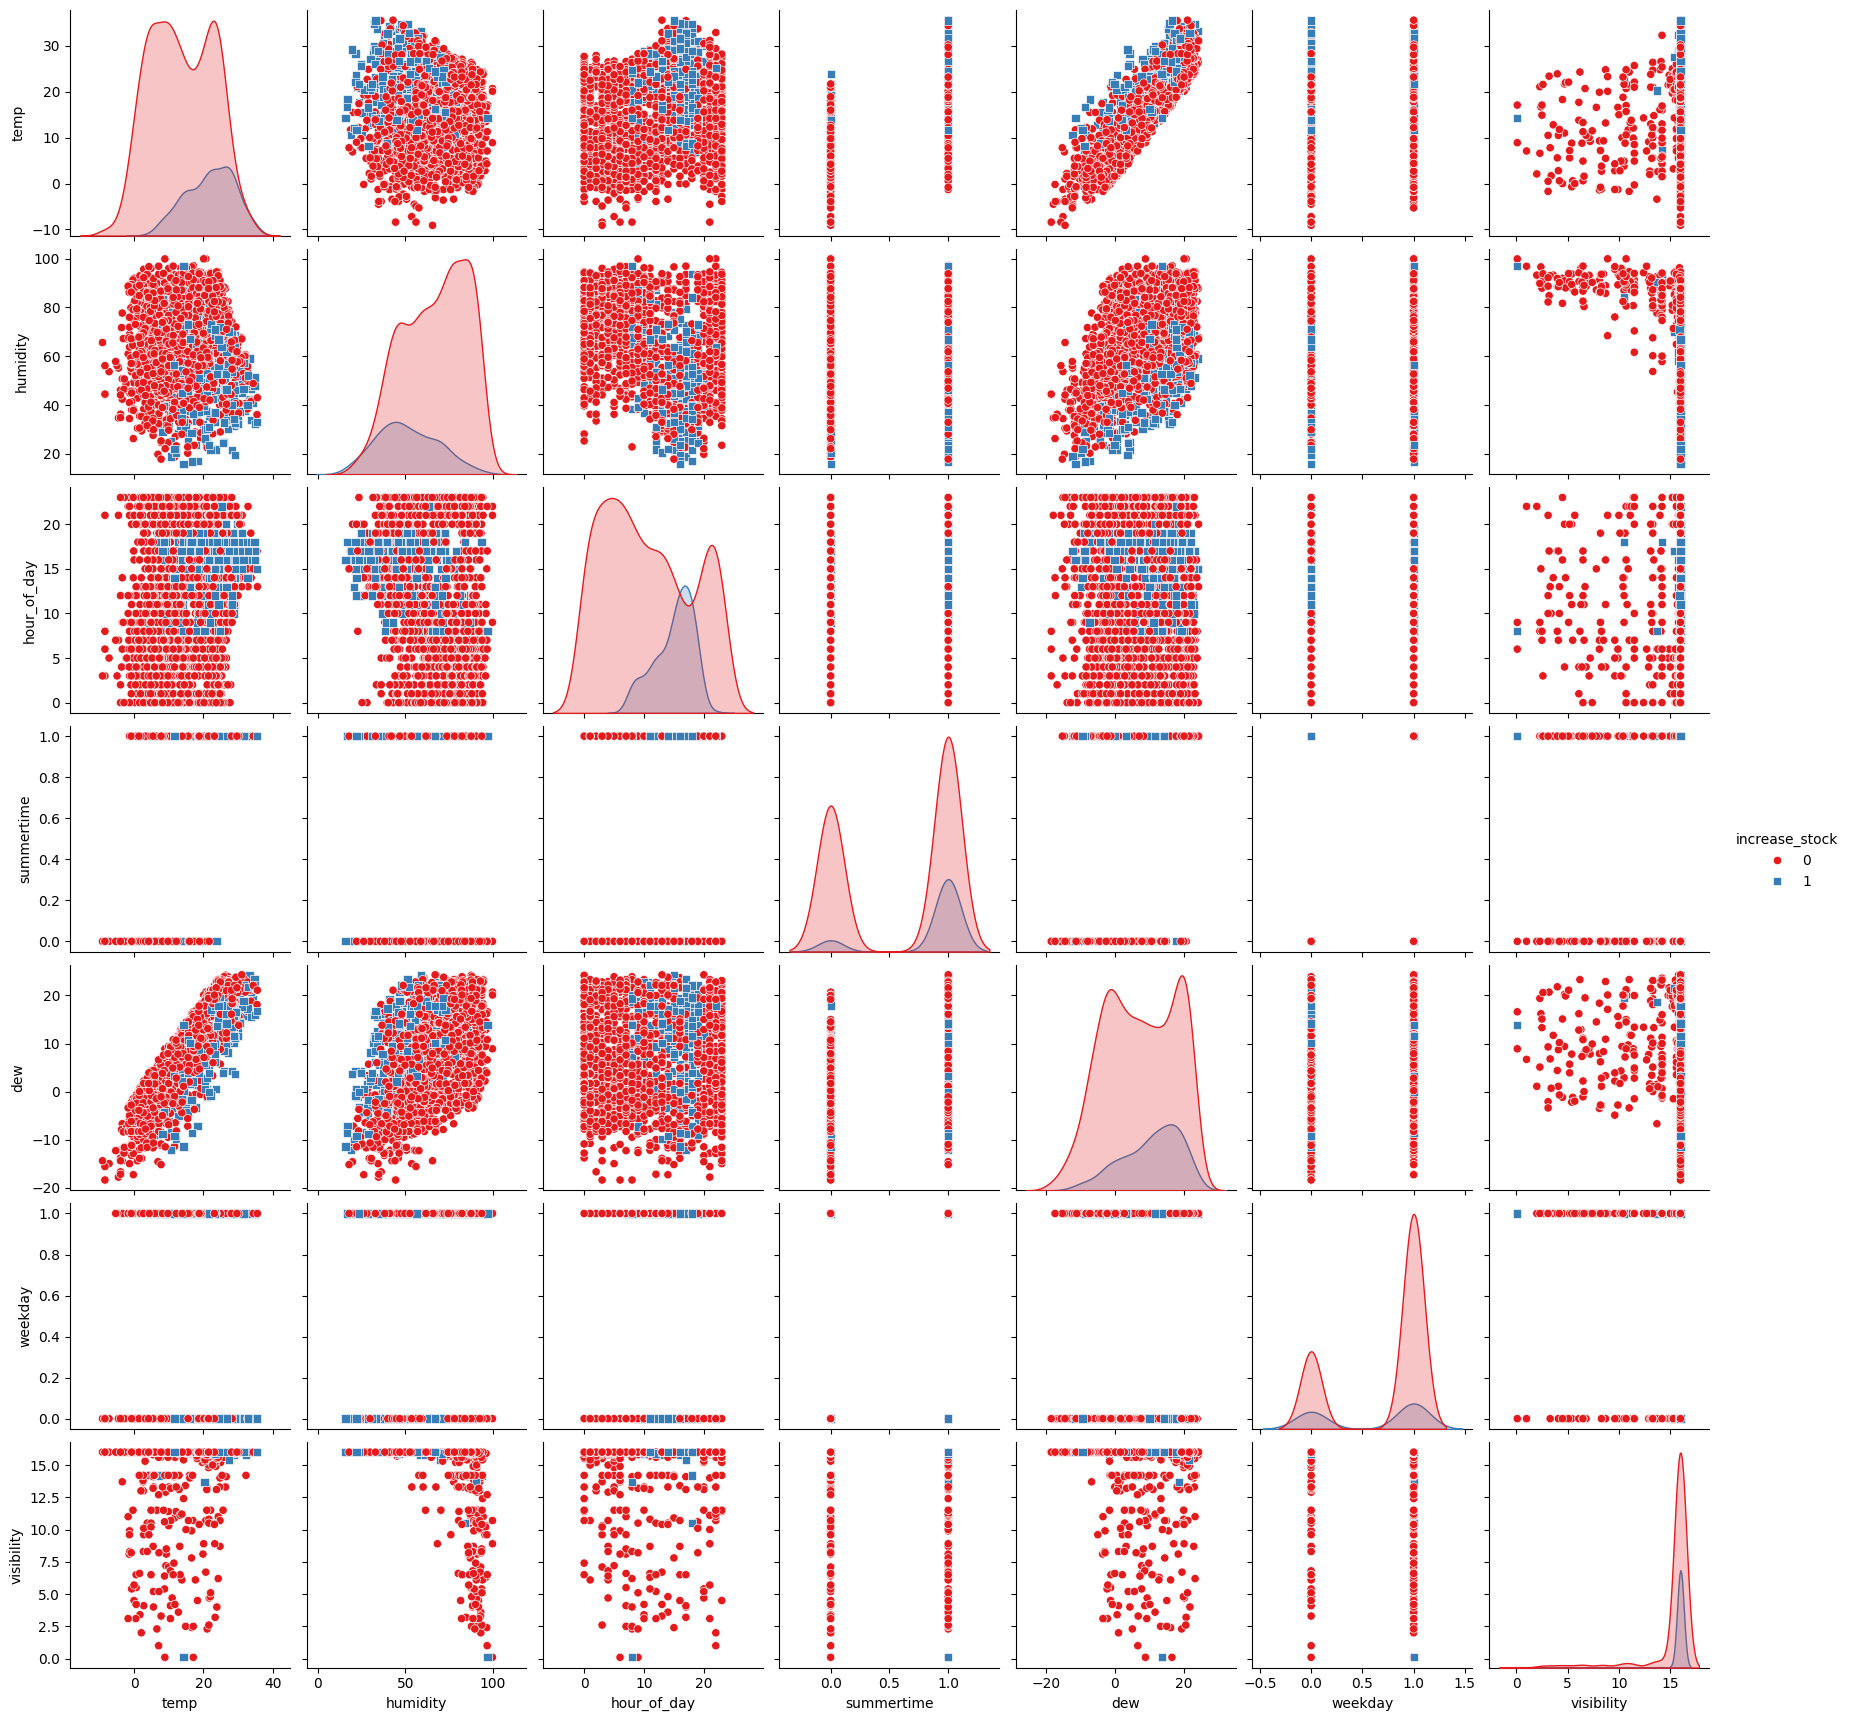

In [13]:
corr_feature = corr.index[corr>=0.1].tolist()

plt.figure(figsize=[12,10])
sns.pairplot(df[corr_feature], hue='increase_stock', diag_kind='kde', markers=['o','s'], palette='Set1')
plt.show()

In [14]:
corr_feature

['increase_stock',
 'temp',
 'humidity',
 'hour_of_day',
 'summertime',
 'dew',
 'weekday',
 'visibility']

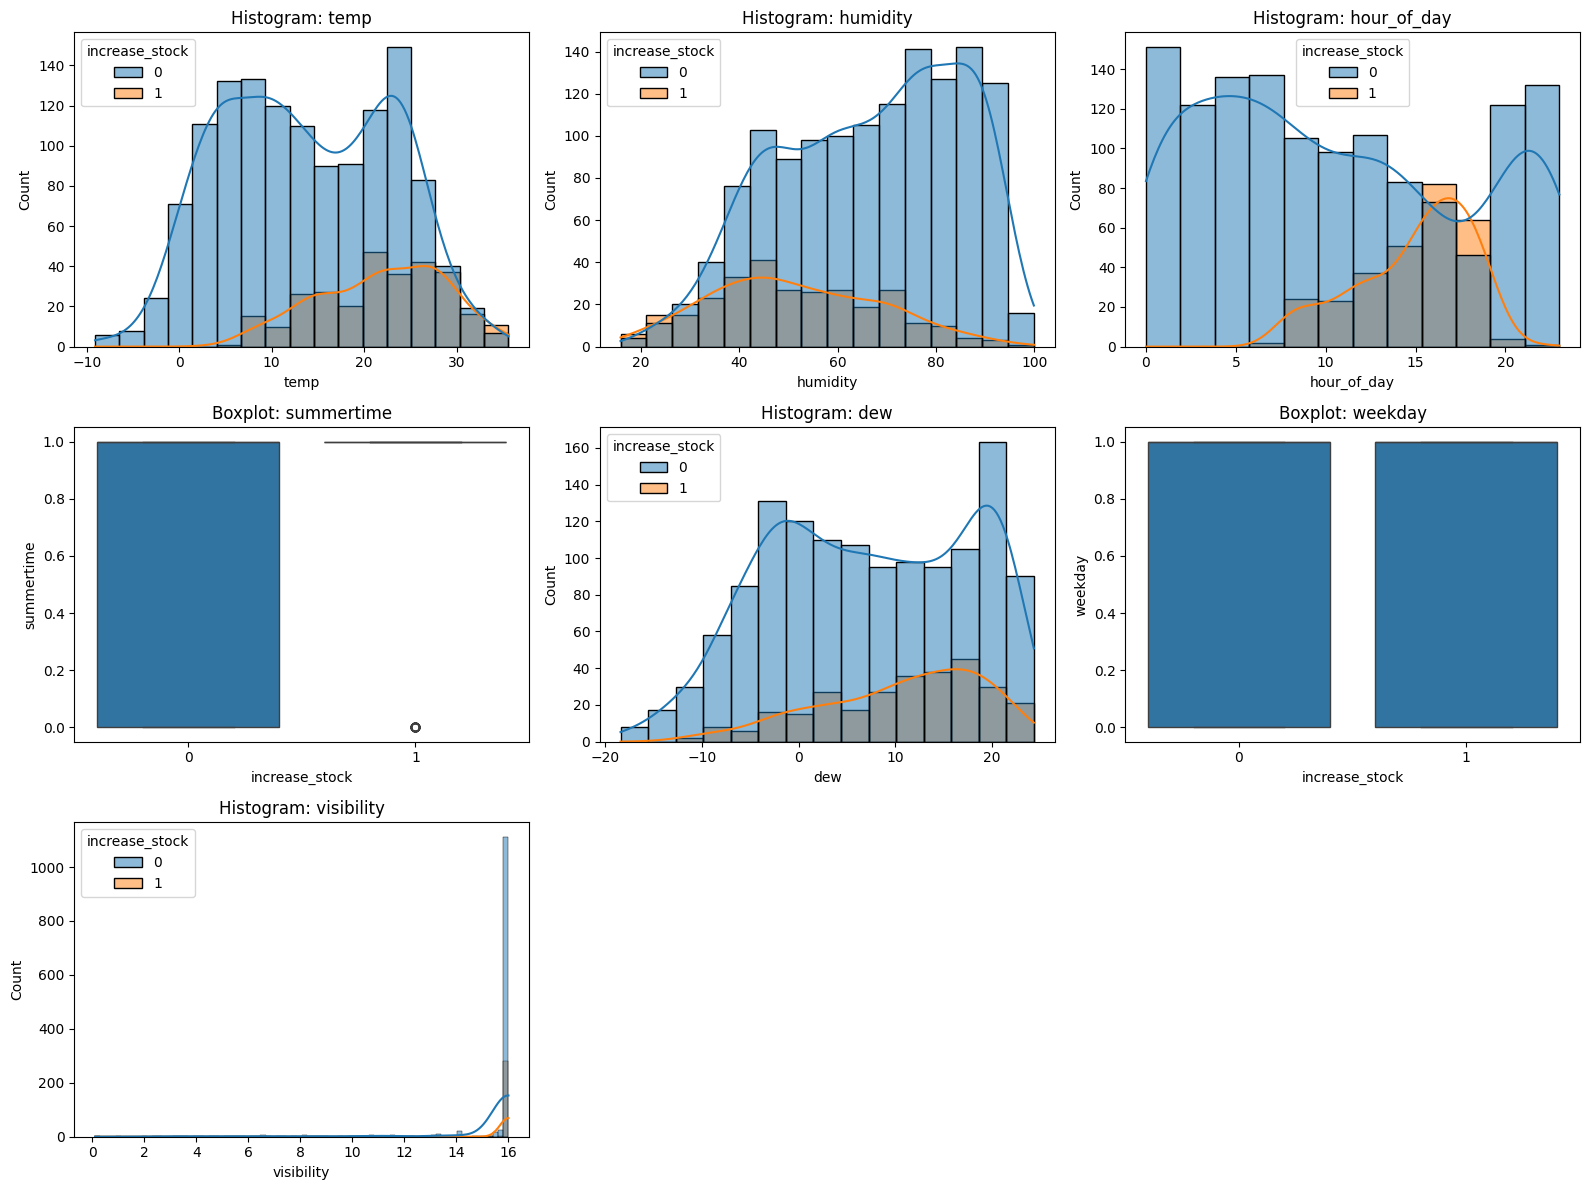

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude target column
cols = [c for c in corr_feature if c != 'increase_stock']

# Desired layout
n_rows, n_cols = 3, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))

# Flatten subplot grid to simplify indexing
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]

    # Categorical → boxplot
    if col in categorical_cols:
        sns.boxplot(data=df, x='increase_stock', y=col, ax=ax)
        ax.set_title(f"Boxplot: {col}")

    # Numerical → histogram
    else:
        sns.histplot(data=df, x=col, hue='increase_stock', kde=True, ax=ax)
        ax.set_title(f"Histogram: {col}")

# Turn off unused subplots if cols < 12
for j in range(len(cols), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
fig.savefig("../report/figures/box_and_hist_features.png", dpi=300)
plt.show()

### Preperation and preprocessing

In [16]:
# model preparation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn.model_selection import train_test_split, cross_validate


class model_prep:
    def __init__(self, model, X, y):
        self.model = model
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, 
                                                                                test_size=0.2, random_state=42)
    def train(self,):
        time_start = time()
        self.model.fit(self.X_train, self.y_train)
        time_end = time()
        print(f"Training time: {time_end - time_start:.4f} seconds")
        return 

    def predict(self):
        self.y_pred =  self.model.predict(self.X_test)
        return self.y_pred
    
    def cross_val(self,kwargs):
        self.cv_resutls = cross_validate(self.model, self.X_train, self.y_train, **kwargs)
        return self.cv_resutls
        
    def evaluate(self, plot_cm=True, report=True):
        if not hasattr(self, 'y_pred'):
            self.predict()
        self.cm = confusion_matrix(self.y_test, self.y_pred)
        self.clasf_report = classification_report(self.y_test, self.y_pred)
        
        if plot_cm:
            disp = ConfusionMatrixDisplay(confusion_matrix=self.cm)
            disp.plot(cmap=plt.cm.Blues)
            plt.title('Confusion Matrix')
            plt.show()
            
        if report:
            print("\nClassification Report:\n", self.clasf_report)
        
        return 






In [17]:
# data preparation
if "increase_stock" in corr_feature:
    corr_feature.remove("increase_stock")
X = df[corr_feature].copy()
y = df['increase_stock'].copy().astype('int')



In [18]:
# adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

scorers = {
    'precision_0': make_scorer(precision_score, average=None, labels=[0]),
    'precision_1': make_scorer(precision_score, average=None, labels=[1]),
    'recall_0': make_scorer(recall_score, average=None, labels=[0]),
    'recall_1': make_scorer(recall_score, average=None, labels=[1]),
    'f1_0': make_scorer(f1_score, average=None, labels=[0]),
    'f1_1': make_scorer(f1_score, average=None, labels=[1]),
}
cv_param = {'cv':5, 'scoring':scorers}

print('AdaBoostClassifier')
ada_model = model_prep(AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42),X, y)
ada_model.train()

for key, value in ada_model.cross_val(cv_param).items():
    print(f"{key}: {value.mean()}")






AdaBoostClassifier
Training time: 0.0035 seconds
fit_time: 0.0022820949554443358
score_time: 0.0034493446350097657
test_precision_0: 0.9160519600273955
test_precision_1: 0.6427045075766303
test_recall_0: 0.9184026499815975
test_recall_1: 0.6297872340425532
test_f1_0: 0.9170356298678657
test_f1_1: 0.6334004704972446


In [19]:
# gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
print('GradientBoostingClassifier')
grad_model = model_prep(GradientBoostingClassifier(random_state=42),X,y)
grad_model.train()
grad_model.cross_val(cv_param)
for key, value in grad_model.cross_val(cv_param).items():
    print(f"{key}: {value.mean()}")

GradientBoostingClassifier
Training time: 0.0890 seconds
fit_time: 0.07232398986816406
score_time: 0.003549337387084961
test_precision_0: 0.9238413592849073
test_precision_1: 0.7729321445110919
test_recall_0: 0.9548767022451232
test_recall_1: 0.6554964539007092
test_f1_0: 0.9390562575473709
test_f1_1: 0.7084145205099228


In [20]:
# catboosting
from catboost import CatBoostClassifier
print('CatBoostClassifier')
cat_model = model_prep(CatBoostClassifier(random_state=42, verbose=0),X,y)
cat_model.train()
cat_model.cross_val(cv_param)
for key, value in cat_model.cross_val(cv_param).items():
    print(f"{key}: {value.mean()}")

CatBoostClassifier
Training time: 0.5812 seconds
fit_time: 0.4689779758453369
score_time: 0.0039019107818603514
test_precision_0: 0.93170559654697
test_precision_1: 0.7827904469208817
test_recall_0: 0.9548767022451232
test_recall_1: 0.6931737588652483
test_f1_0: 0.9430718859245127
test_f1_1: 0.7337377872827189


**catboosting seems to be the best performer**
Feature transformation:

- make visibility >=15 as 1, <15 as 0

- cyclical encoding "hour_of_day"
  

In [21]:
# visibility transformation
df['visibility_bool'] = df['visibility']>15

# cyclic features transformation
def cyclic_transform(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col] / max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col] / max_val)
    
cyclic_transform(df, 'hour_of_day', 24)

# make new corr feature
corr_feature_new = corr_feature.copy()
corr_feature_new.remove('visibility')
corr_feature_new.remove('hour_of_day')
corr_feature_new.extend(['hour_of_day_sin', 'hour_of_day_cos', 'visibility_bool'])


In [22]:


X = df[corr_feature_new].copy()
y = df['increase_stock'].copy().astype('int')

print('CatBoostClassifier_with_new_features')
cat_model_new = model_prep(CatBoostClassifier(random_state=43, verbose=0),X, y)
cat_model_new.train()
cat_model_new.cross_val(cv_param)

CatBoostClassifier_with_new_features
Training time: 0.5689 seconds


{'fit_time': array([0.47445607, 0.48833895, 0.48642492, 0.48478198, 0.50261188]),
 'score_time': array([0.00420284, 0.00460792, 0.00442696, 0.00417495, 0.00376201]),
 'test_precision_0': array([0.93119266, 0.9266055 , 0.92822967, 0.93269231, 0.92694064]),
 'test_precision_1': array([0.84210526, 0.81578947, 0.70212766, 0.70833333, 0.86486486]),
 'test_recall_0': array([0.97129187, 0.96650718, 0.93269231, 0.93269231, 0.97596154]),
 'test_recall_1': array([0.68085106, 0.65957447, 0.6875    , 0.70833333, 0.66666667]),
 'test_f1_0': array([0.95081967, 0.94613583, 0.93045564, 0.93269231, 0.95081967]),
 'test_f1_1': array([0.75294118, 0.72941176, 0.69473684, 0.70833333, 0.75294118])}

In [23]:
corr_feature_2 = corr.index[corr>=0.2].tolist()
corr_feature_2.remove('increase_stock')

X = df[corr_feature_2].copy()
y = df['increase_stock'].copy().astype('int')

# adaptive boosting
print('CatBoostClassifier_with_strong_correlation_features')
cat_model_strong = model_prep(CatBoostClassifier(random_state=44,verbose=0),X,y)
cat_model_strong.train()
cat_model_strong.cross_val(cv_param)


CatBoostClassifier_with_strong_correlation_features
Training time: 0.4966 seconds


{'fit_time': array([0.43271899, 0.43817496, 0.56933904, 0.43490291, 0.42380524]),
 'score_time': array([0.00425696, 0.00384402, 0.00369406, 0.00484419, 0.0037148 ]),
 'test_precision_0': array([0.90697674, 0.92592593, 0.9124424 , 0.91981132, 0.91891892]),
 'test_precision_1': array([0.65853659, 0.775     , 0.74358974, 0.70454545, 0.88235294]),
 'test_recall_0': array([0.93301435, 0.9569378 , 0.95192308, 0.9375    , 0.98076923]),
 'test_recall_1': array([0.57446809, 0.65957447, 0.60416667, 0.64583333, 0.625     ]),
 'test_f1_0': array([0.91981132, 0.94117647, 0.93176471, 0.92857143, 0.94883721]),
 'test_f1_1': array([0.61363636, 0.71264368, 0.66666667, 0.67391304, 0.73170732])}

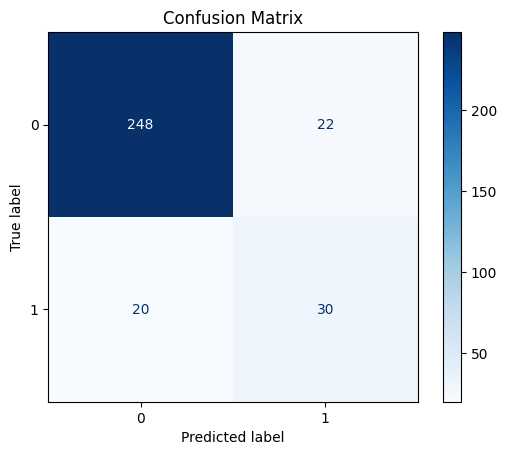


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       270
           1       0.58      0.60      0.59        50

    accuracy                           0.87       320
   macro avg       0.75      0.76      0.76       320
weighted avg       0.87      0.87      0.87       320



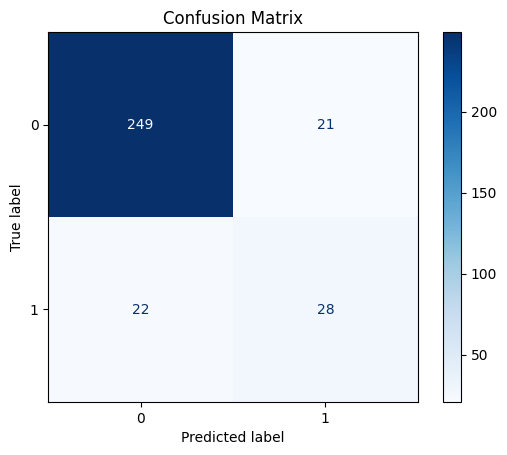


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       270
           1       0.57      0.56      0.57        50

    accuracy                           0.87       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.86      0.87      0.87       320



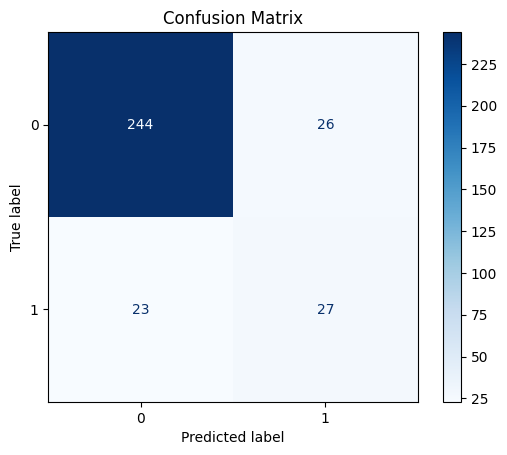


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       270
           1       0.51      0.54      0.52        50

    accuracy                           0.85       320
   macro avg       0.71      0.72      0.72       320
weighted avg       0.85      0.85      0.85       320



In [25]:
cat_model.evaluate()
cat_model_new.evaluate()
cat_model_strong.evaluate()

The cross_validation result does not show any better with converting 'visibility' to binary categorical or have cyclical encoding time for 'hour_of_day'. 

It makes sense since boosting method tends to fit the training data as much as possible. The small detail in the data can be captured. 

### Hyperparameters tuning
the training time is not long with 50 estimatiors, try use grid_search 


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score


# define cat estimator
cat = CatBoostClassifier(verbose=0, random_seed=51)

# define hyperparameters
scorer_pos = make_scorer(average_precision_score, needs_proba=True)

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


# grid search
grid_search = GridSearchCV(
    estimator=cat,
    param_grid=grid,
    scoring=scorer_pos,
    cv=5,
    n_jobs=10,
    verbose=2
)

grid_search.fit(ada_model.X_train, ada_model.y_train)

print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=4, l2_leaf_reg=1, learning_rate=0.03; total time=   0.5s
[CV] END .........depth=4, l2_leaf_reg=1, learning_rate=0.03; total time=   0.5s
[CV] END ..........depth=4, l2_leaf_reg=1, learning_rate=0.1; total time=   0.5s
[CV] END ..........depth=4, l2_leaf_reg=1, learning_rate=0.1; total time=   0.5s
[CV] END ..........depth=4, l2_leaf_reg=1, learning_rate=0.1; total time=   0.5s
[CV] END ..........depth=4, l2_leaf_reg=1, learning_rate=0.1; total time=   0.5s
[CV] END .........depth=4, l2_leaf_reg=1, learning_rate=0.03; total time=   0.5s
[CV] END .........depth=4, l2_leaf_reg=1, learning_rate=0.03; total time=   0.6s
[CV] END .........depth=4, l2_leaf_reg=1, learning_rate=0.03; total time=   0.6s
[CV] END ..........depth=4, l2_leaf_reg=1, learning_rate=0.1; total time=   0.6s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=4, l2_leaf_reg=3, learning_rate=0.03; total time=   0.4s
[CV] END .........depth=4, l2_leaf_reg=3, learning_rate=0.03; total time=   0.4s
[CV] END .........depth=4, l2_leaf_reg=3, learning_rate=0.03; total time=   0.4s
[CV] END ..........depth=4, l2_leaf_reg=3, learning_rate=0.1; total time=   0.4s
[CV] END ..........depth=4, l2_leaf_reg=3, learning_rate=0.1; total time=   0.4s
[CV] END .........depth=4, l2_leaf_reg=3, learning_rate=0.03; total time=   0.4s
[CV] END .........depth=4, l2_leaf_reg=3, learning_rate=0.03; total time=   0.4s
[CV] END ..........depth=4, l2_leaf_reg=3, learning_rate=0.1; total time=   0.4s
[CV] END ..........depth=4, l2_leaf_reg=3, learning_rate=0.1; total time=   0.4s
[CV] END ..........depth=4, l2_leaf_reg=3, learning_rate=0.1; total time=   0.4s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ..........depth=4, l2_leaf_reg=5, learning_rate=0.1; total time=   0.4s
[CV] END .........depth=4, l2_leaf_reg=5, learning_rate=0.03; total time=   0.4s
[CV] END ..........depth=4, l2_leaf_reg=5, learning_rate=0.1; total time=   0.4s
[CV] END ..........depth=4, l2_leaf_reg=5, learning_rate=0.1; total time=   0.4s
[CV] END ..........depth=4, l2_leaf_reg=5, learning_rate=0.1; total time=   0.4s
[CV] END .........depth=4, l2_leaf_reg=5, learning_rate=0.03; total time=   0.4s
[CV] END .........depth=4, l2_leaf_reg=5, learning_rate=0.03; total time=   0.4s
[CV] END .........depth=4, l2_leaf_reg=5, learning_rate=0.03; total time=   0.4s[CV] END .........depth=4, l2_leaf_reg=5, learning_rate=0.03; total time=   0.4s

[CV] END ..........depth=4, l2_leaf_reg=5, learning_rate=0.1; total time=   0.4s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=4, l2_leaf_reg=7, learning_rate=0.03; total time=   0.4s
[CV] END ..........depth=4, l2_leaf_reg=7, learning_rate=0.1; total time=   0.6s
[CV] END ..........depth=4, l2_leaf_reg=7, learning_rate=0.1; total time=   0.6s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=4, l2_leaf_reg=7, learning_rate=0.03; total time=   0.6s
[CV] END ..........depth=4, l2_leaf_reg=7, learning_rate=0.1; total time=   0.6s
[CV] END .........depth=4, l2_leaf_reg=7, learning_rate=0.03; total time=   0.6s
[CV] END ..........depth=4, l2_leaf_reg=7, learning_rate=0.1; total time=   0.6s
[CV] END .........depth=4, l2_leaf_reg=7, learning_rate=0.03; total time=   0.6s
[CV] END ..........depth=4, l2_leaf_reg=7, learning_rate=0.1; total time=   0.6s
[CV] END .........depth=4, l2_leaf_reg=7, learning_rate=0.03; total time=   0.6s
[CV] END .........depth=4, l2_leaf_reg=9, learning_rate=0.03; total time=   0.4s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ..........depth=4, l2_leaf_reg=9, learning_rate=0.1; total time=   0.4s
[CV] END .........depth=4, l2_leaf_reg=9, learning_rate=0.03; total time=   0.5s
[CV] END ..........depth=4, l2_leaf_reg=9, learning_rate=0.1; total time=   0.5s
[CV] END ..........depth=4, l2_leaf_reg=9, learning_rate=0.1; total time=   0.5s
[CV] END ..........depth=4, l2_leaf_reg=9, learning_rate=0.1; total time=   0.5s
[CV] END .........depth=4, l2_leaf_reg=9, learning_rate=0.03; total time=   0.5s
[CV] END .........depth=4, l2_leaf_reg=9, learning_rate=0.03; total time=   0.5s
[CV] END ..........depth=4, l2_leaf_reg=9, learning_rate=0.1; total time=   0.5s
[CV] END .........depth=4, l2_leaf_reg=9, learning_rate=0.03; total time=   0.5s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=6, l2_leaf_reg=1, learning_rate=0.03; total time=   0.8s
[CV] END .........depth=6, l2_leaf_reg=1, learning_rate=0.03; total time=   0.7s
[CV] END .........depth=6, l2_leaf_reg=1, learning_rate=0.03; total time=   0.7s
[CV] END .........depth=6, l2_leaf_reg=1, learning_rate=0.03; total time=   0.7s
[CV] END .........depth=6, l2_leaf_reg=1, learning_rate=0.03; total time=   0.7s
[CV] END ..........depth=6, l2_leaf_reg=1, learning_rate=0.1; total time=   0.7s
[CV] END ..........depth=6, l2_leaf_reg=1, learning_rate=0.1; total time=   0.7s
[CV] END ..........depth=6, l2_leaf_reg=1, learning_rate=0.1; total time=   0.7s
[CV] END ..........depth=6, l2_leaf_reg=1, learning_rate=0.1; total time=   0.7s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=6, l2_leaf_reg=3, learning_rate=0.03; total time=   0.7s
[CV] END .........depth=6, l2_leaf_reg=3, learning_rate=0.03; total time=   0.7s
[CV] END .........depth=6, l2_leaf_reg=3, learning_rate=0.03; total time=   0.7s
[CV] END ..........depth=6, l2_leaf_reg=3, learning_rate=0.1; total time=   0.7s
[CV] END .........depth=6, l2_leaf_reg=3, learning_rate=0.03; total time=   0.7s
[CV] END .........depth=6, l2_leaf_reg=3, learning_rate=0.03; total time=   0.7s
[CV] END ..........depth=6, l2_leaf_reg=3, learning_rate=0.1; total time=   0.7s
[CV] END ..........depth=6, l2_leaf_reg=3, learning_rate=0.1; total time=   0.7s
[CV] END ..........depth=6, l2_leaf_reg=1, learning_rate=0.1; total time=   1.4s
[CV] END ..........depth=6, l2_leaf_reg=3, learning_rate=0.1; total time=   0.7s
[CV] END ..........depth=6, l2_leaf_reg=3, learning_rate=0.1; total time=   0.7s
[CV] END .........depth=6, l2_leaf_reg=5, learning_rate=0.03; total time=   0.6s
[CV] END .........depth=6, l

/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ..........depth=6, l2_leaf_reg=5, learning_rate=0.1; total time=   0.7s
[CV] END .........depth=6, l2_leaf_reg=7, learning_rate=0.03; total time=   0.7s
[CV] END ..........depth=6, l2_leaf_reg=7, learning_rate=0.1; total time=   0.7s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=6, l2_leaf_reg=7, learning_rate=0.03; total time=   0.8s
[CV] END .........depth=6, l2_leaf_reg=7, learning_rate=0.03; total time=   0.8s
[CV] END .........depth=6, l2_leaf_reg=7, learning_rate=0.03; total time=   0.8s
[CV] END .........depth=6, l2_leaf_reg=7, learning_rate=0.03; total time=   0.9s
[CV] END ..........depth=6, l2_leaf_reg=7, learning_rate=0.1; total time=   0.8s
[CV] END ..........depth=6, l2_leaf_reg=5, learning_rate=0.1; total time=   1.5s
[CV] END ..........depth=6, l2_leaf_reg=7, learning_rate=0.1; total time=   0.8s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ..........depth=6, l2_leaf_reg=7, learning_rate=0.1; total time=   0.9s
[CV] END ..........depth=6, l2_leaf_reg=7, learning_rate=0.1; total time=   0.8s
[CV] END .........depth=6, l2_leaf_reg=9, learning_rate=0.03; total time=   0.8s
[CV] END .........depth=6, l2_leaf_reg=9, learning_rate=0.03; total time=   0.7s
[CV] END .........depth=6, l2_leaf_reg=9, learning_rate=0.03; total time=   0.8s
[CV] END .........depth=6, l2_leaf_reg=9, learning_rate=0.03; total time=   0.8s
[CV] END .........depth=6, l2_leaf_reg=9, learning_rate=0.03; total time=   0.8s
[CV] END ..........depth=6, l2_leaf_reg=9, learning_rate=0.1; total time=   0.8s
[CV] END ..........depth=6, l2_leaf_reg=9, learning_rate=0.1; total time=   0.8s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ..........depth=6, l2_leaf_reg=9, learning_rate=0.1; total time=   1.2s
[CV] END ..........depth=6, l2_leaf_reg=9, learning_rate=0.1; total time=   0.8s
[CV] END ..........depth=6, l2_leaf_reg=9, learning_rate=0.1; total time=   0.8s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ........depth=10, l2_leaf_reg=1, learning_rate=0.03; total time=   6.8s
[CV] END ........depth=10, l2_leaf_reg=1, learning_rate=0.03; total time=   6.9s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=10, l2_leaf_reg=1, learning_rate=0.1; total time=   6.9s
[CV] END ........depth=10, l2_leaf_reg=1, learning_rate=0.03; total time=   7.0s
[CV] END ........depth=10, l2_leaf_reg=1, learning_rate=0.03; total time=   7.0s
[CV] END ........depth=10, l2_leaf_reg=1, learning_rate=0.03; total time=   7.1s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=10, l2_leaf_reg=1, learning_rate=0.1; total time=   7.2s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=10, l2_leaf_reg=1, learning_rate=0.1; total time=   6.8s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=10, l2_leaf_reg=1, learning_rate=0.1; total time=   7.1s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=10, l2_leaf_reg=1, learning_rate=0.1; total time=   8.4s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ........depth=10, l2_leaf_reg=3, learning_rate=0.03; total time=   6.4s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ........depth=10, l2_leaf_reg=3, learning_rate=0.03; total time=   6.6s
[CV] END ........depth=10, l2_leaf_reg=3, learning_rate=0.03; total time=   6.7s
[CV] END ........depth=10, l2_leaf_reg=3, learning_rate=0.03; total time=   6.5s
[CV] END ........depth=10, l2_leaf_reg=3, learning_rate=0.03; total time=   6.5s
[CV] END .........depth=10, l2_leaf_reg=3, learning_rate=0.1; total time=   6.4s
[CV] END .........depth=10, l2_leaf_reg=3, learning_rate=0.1; total time=   6.5s
[CV] END .........depth=10, l2_leaf_reg=3, learning_rate=0.1; total time=   6.4s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=10, l2_leaf_reg=3, learning_rate=0.1; total time=   6.4s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=10, l2_leaf_reg=3, learning_rate=0.1; total time=   6.3s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ........depth=10, l2_leaf_reg=5, learning_rate=0.03; total time=   6.3s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ........depth=10, l2_leaf_reg=5, learning_rate=0.03; total time=   6.1s
[CV] END ........depth=10, l2_leaf_reg=5, learning_rate=0.03; total time=   6.1s
[CV] END ........depth=10, l2_leaf_reg=5, learning_rate=0.03; total time=   6.2s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=10, l2_leaf_reg=5, learning_rate=0.1; total time=   6.3s
[CV] END ........depth=10, l2_leaf_reg=5, learning_rate=0.03; total time=   6.4s
[CV] END .........depth=10, l2_leaf_reg=5, learning_rate=0.1; total time=   6.3s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=10, l2_leaf_reg=5, learning_rate=0.1; total time=   6.5s
[CV] END .........depth=10, l2_leaf_reg=5, learning_rate=0.1; total time=   6.4s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=10, l2_leaf_reg=5, learning_rate=0.1; total time=   6.2s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ........depth=10, l2_leaf_reg=7, learning_rate=0.03; total time=   5.4s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ........depth=10, l2_leaf_reg=7, learning_rate=0.03; total time=   5.4s
[CV] END ........depth=10, l2_leaf_reg=7, learning_rate=0.03; total time=   5.4s
[CV] END ........depth=10, l2_leaf_reg=7, learning_rate=0.03; total time=   5.4s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ........depth=10, l2_leaf_reg=7, learning_rate=0.03; total time=   5.6s
[CV] END .........depth=10, l2_leaf_reg=7, learning_rate=0.1; total time=   5.6s
[CV] END .........depth=10, l2_leaf_reg=7, learning_rate=0.1; total time=   5.6s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=10, l2_leaf_reg=7, learning_rate=0.1; total time=   5.4s
[CV] END .........depth=10, l2_leaf_reg=7, learning_rate=0.1; total time=   5.4s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=10, l2_leaf_reg=7, learning_rate=0.1; total time=   5.3s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ........depth=10, l2_leaf_reg=9, learning_rate=0.03; total time=   5.5s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ........depth=10, l2_leaf_reg=9, learning_rate=0.03; total time=   5.5s
[CV] END ........depth=10, l2_leaf_reg=9, learning_rate=0.03; total time=   5.5s
[CV] END ........depth=10, l2_leaf_reg=9, learning_rate=0.03; total time=   5.5s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END ........depth=10, l2_leaf_reg=9, learning_rate=0.03; total time=   5.4s
[CV] END .........depth=10, l2_leaf_reg=9, learning_rate=0.1; total time=   5.4s
[CV] END .........depth=10, l2_leaf_reg=9, learning_rate=0.1; total time=   5.5s
[CV] END .........depth=10, l2_leaf_reg=9, learning_rate=0.1; total time=   5.2s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=10, l2_leaf_reg=9, learning_rate=0.1; total time=   5.2s


/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:953: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 942, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 308, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/zhiya463/projects/sml_project/.venv/lib/python3.13/site-packages/sklearn/metrics/_scorer.py", line 408, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                     

[CV] END .........depth=10, l2_leaf_reg=9, learning_rate=0.1; total time=   4.6s
Best parameters found:  {'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.03}


Training time: 0.3534 seconds


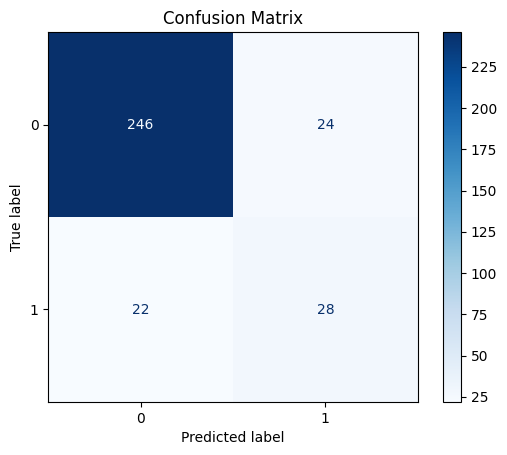


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       270
           1       0.54      0.56      0.55        50

    accuracy                           0.86       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.86      0.86      0.86       320



In [31]:
X = df[corr_feature].copy()
y = df['increase_stock'].copy().astype('int')
best_param = grid_search.best_params_
best_cat = model_prep(CatBoostClassifier(verbose=0).set_params(**best_param), X, y)
best_cat.train()
best_cat.evaluate()